In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/content/Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
df.corr()['LeaveOrNot']

<ipython-input-6-2337bd982b8f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['LeaveOrNot']


JoiningYear                  0.181705
PaymentTier                 -0.197638
Age                         -0.051126
ExperienceInCurrentDomain   -0.030504
LeaveOrNot                   1.000000
Name: LeaveOrNot, dtype: float64

In [7]:
df['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

<Axes: >

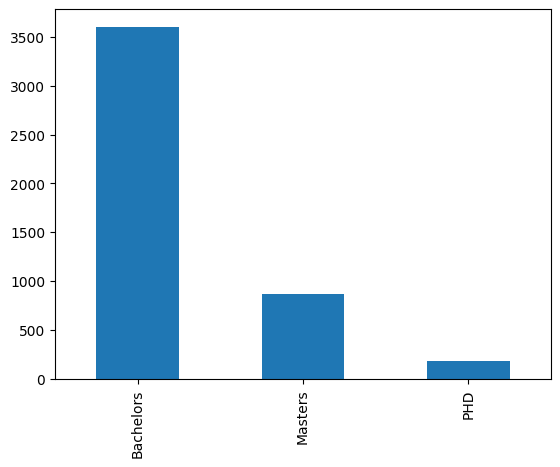

In [8]:
df['Education'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Education', ylabel='LeaveOrNot'>

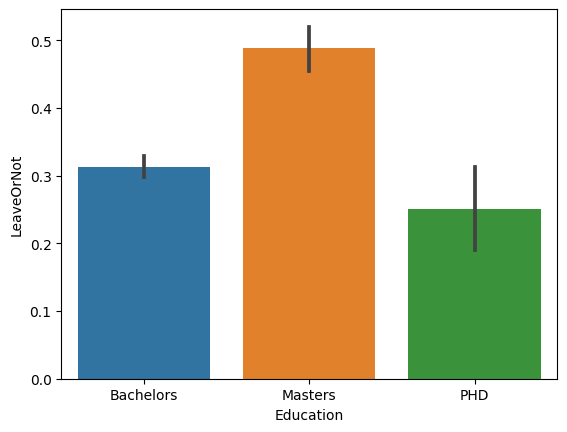

In [9]:
import seaborn as sns
sns.barplot(x = df['Education'] , y = df['LeaveOrNot'])

In [10]:
def Education_Labels (n):
  if n == 'Bachelors':
    return 0
  elif n == 'Masters':
    return 1
  elif n == 'PHD':
    return 2

In [13]:
df['Education_Labels'] = df['Education'].apply(Education_Labels)

In [15]:
df.drop(columns = ['Education'] , inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   JoiningYear                4653 non-null   int64 
 1   City                       4653 non-null   object
 2   PaymentTier                4653 non-null   int64 
 3   Age                        4653 non-null   int64 
 4   Gender                     4653 non-null   object
 5   EverBenched                4653 non-null   object
 6   ExperienceInCurrentDomain  4653 non-null   int64 
 7   LeaveOrNot                 4653 non-null   int64 
 8   Education_Labels           4653 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 327.3+ KB


<Axes: xlabel='City', ylabel='LeaveOrNot'>

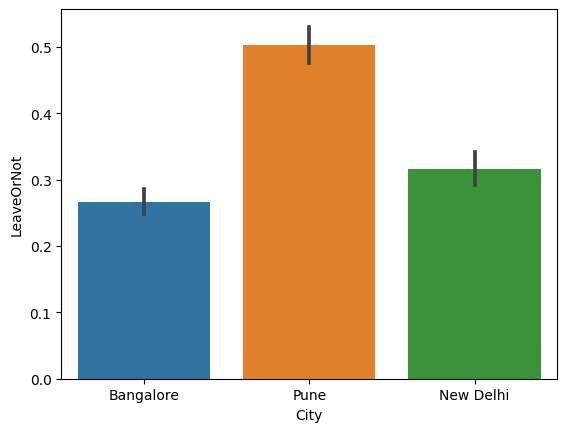

In [21]:
sns.barplot(x = df['City'] , y = df['LeaveOrNot'])

In [26]:
def City_Labels (n):
  if n == 'Bangalore':
    return 0
  elif n == 'Pune':
    return 1
  elif n == 'New Delhi':
    return 2

df['City'] = df['City'].apply(City_Labels)

In [28]:
df['City'] = df['City'].astype('int')

In [29]:
df.sample(5)

,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Labels
3818,2013,1,3,32,Male,No,5,0,0
1841,2013,1,2,24,Male,Yes,2,1,0
4329,2014,0,3,22,Female,No,0,1,0
960,2017,1,3,24,Male,No,2,0,0
4255,2012,2,3,22,Female,No,0,0,0


In [32]:
df['Gender'] = df['Gender'].apply(lambda x:1 if "Male" in x else 0)

<Axes: xlabel='Gender', ylabel='LeaveOrNot'>

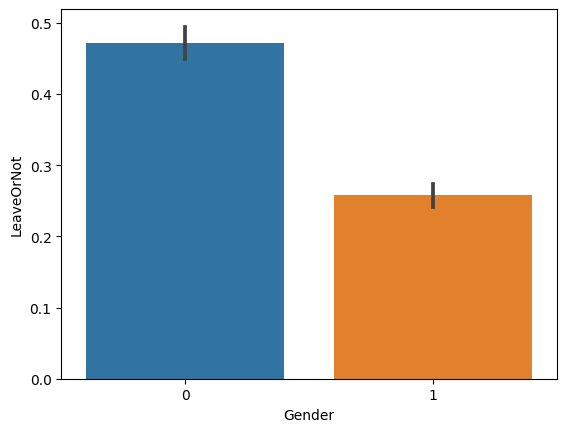

In [33]:
sns.barplot(x = df['Gender'] , y = df['LeaveOrNot'])

<Axes: ylabel='EverBenched'>

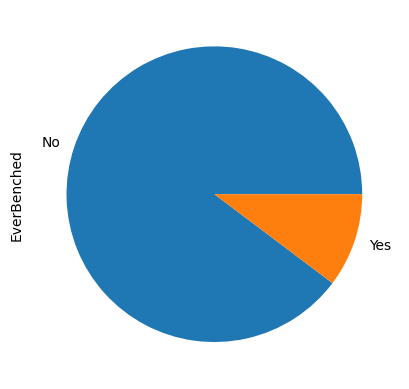

In [36]:
df['EverBenched'].value_counts().plot(kind = 'pie')

<Axes: xlabel='EverBenched', ylabel='LeaveOrNot'>

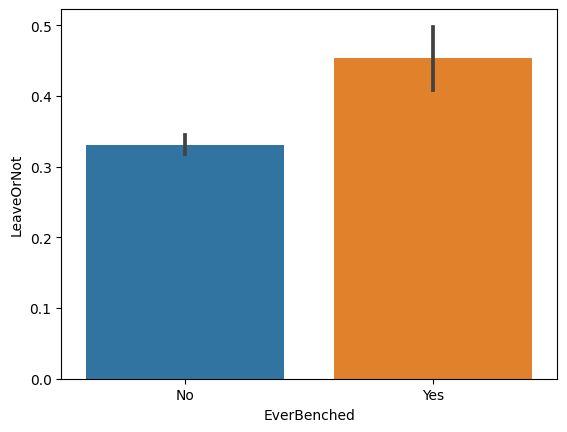

In [38]:
sns.barplot(x = df['EverBenched'] , y = df['LeaveOrNot'])

In [39]:
df['EverBenched'] = df['EverBenched'].apply(lambda x:1 if "Yes" in x else 0)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   JoiningYear                4653 non-null   int64
 1   City                       4653 non-null   int64
 2   PaymentTier                4653 non-null   int64
 3   Age                        4653 non-null   int64
 4   Gender                     4653 non-null   int64
 5   EverBenched                4653 non-null   int64
 6   ExperienceInCurrentDomain  4653 non-null   int64
 7   LeaveOrNot                 4653 non-null   int64
 8   Education_Labels           4653 non-null   int64
dtypes: int64(9)
memory usage: 327.3 KB


In [43]:
df.corr()['LeaveOrNot']

JoiningYear                  0.181705
City                         0.076730
PaymentTier                 -0.197638
Age                         -0.051126
Gender                      -0.220701
EverBenched                  0.078438
ExperienceInCurrentDomain   -0.030504
LeaveOrNot                   1.000000
Education_Labels             0.080497
Name: LeaveOrNot, dtype: float64

<Axes: >

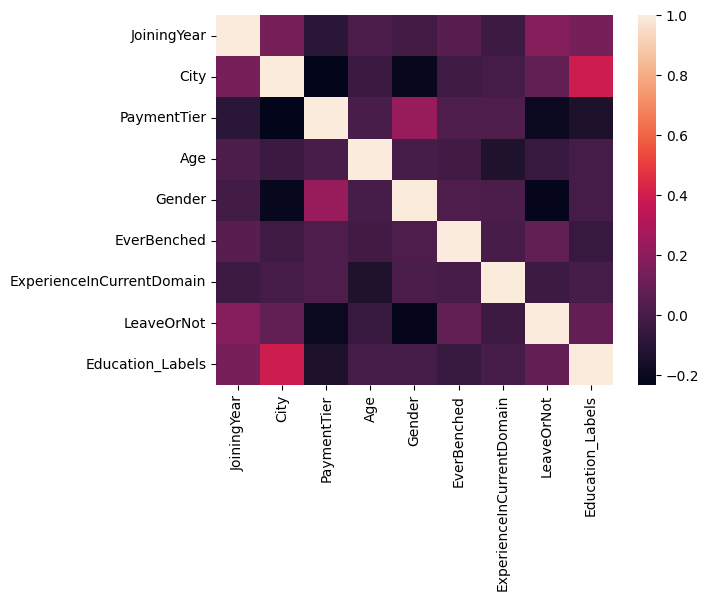

In [44]:
sns.heatmap(df.corr())

In [45]:
X = df.drop(columns = ['LeaveOrNot'] , axis = 1)
y = df['LeaveOrNot']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(y_pred[:10])
print(y_test[:10])

Accuracy: 0.6917293233082706
[0 0 1 1 0 0 0 1 0 0]
297     1
2705    0
501     1
1272    0
3956    0
322     1
1417    1
1034    1
1161    0
1094    1
Name: LeaveOrNot, dtype: int64


In [51]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(y_pred[:10])
print(y_test[:10])

Mean Squared Error: 0.11994810498303397
[ 0.05021697 -0.01849801  0.14378457  0.06154742  0.1029643   0.34743217
  0.87112147  1.0164131   0.01328072  0.99960953]
297     1
2705    0
501     1
1272    0
3956    0
322     1
1417    1
1034    1
1161    0
1094    1
Name: LeaveOrNot, dtype: int64


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(y_pred[:10])
print(y_test[:10])

Accuracy: 0.8528464017185822
[0 0 0 0 0 0 1 1 0 1]
297     1
2705    0
501     1
1272    0
3956    0
322     1
1417    1
1034    1
1161    0
1094    1
Name: LeaveOrNot, dtype: int64
